<a href="https://colab.research.google.com/github/Olivia-Feldman/DLStockPrectionCNNModel-/blob/Jack/get_and_label_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install yfinance and googlefinance
!pip install yfinance
!pip3 install git+https://github.com/pdevty/googlefinance-client-python.git

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=67f59dc7bc1b76766e308fcb885123010c824f28666a5ff1497725df6a74e7a1
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Cloning https://github.com/pdevty/googlefinance-client-python.git to /tmp/pip-req-build-h_i_o81a
  Running command git clone -q https://github.com/pdevty/googlefinance-client-python.git /tmp/pip-req-build-h_i_o81a
     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 245kB 6.2MB/s 
  Created wheel for googlefinance.client: filename=googlefinance.client-1.3.1-cp36-none-any.whl size=4296 sha256=50087d2b5929e277a8902bfdb0c0406255c40866ae4ef4b226300f47149606e3
  Stored in directory: /tmp/pip-eph

In [3]:
# IMPORT YAHOO FINANCE DATA - Functions
# Source: https://medium.com/@jouneidraza522/yahoo-finance-api-to-get-stocks-tickers-data-in-python-c49820249a18
# Source: https://pypi.org/project/googlefinance/

# Imports
from pandas_datareader import data as pdr
from datetime import date as dt # FIX: only import date
import yfinance as yf 
yf.pdr_override()
import pandas as pd

# Define saveData function
def saveData(df, name):
  df.to_csv(name + '.csv')

# Define readCSVData function
def readCSVData (ticker, tag):
  df = pd.read_csv(ticker + '_' + tag + '.csv')
  print(df.head())
  return df

# Define getYahooFinanceData function
def getYahooFinanceData(files, ticker, start_date, end_date, tag):
  # Save to files list
  data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
  dataName = ticker + '_' + tag
  files.append(dataName)

  # Save data to file
  saveData(data, dataName)

In [4]:
# IMPORT YAHOO FINANCE DATA - Executions

# Yahoo Finance

# Tickerlist
tick_list = ['DJIA'] # Ticker list

today = dt.today() # Get today's date

# Choose start and sotp dates
start_date = "2017-01-01"
end_date = "2020-12-31"

# Initialize files list
files = []

counter = 0
for tick in tick_list:
  getYahooFinanceData(files, tick_list[counter], start_date, end_date, 'test')
  readCSVData(tick_list[counter], 'test')
  counter += 1

[*********************100%***********************]  1 of 1 completed
         Date          Open  ...     Adj Close      Volume
0  2017-01-03  19872.859375  ...  19881.759766  3770530000
1  2017-01-04  19890.939453  ...  19942.160156  3764890000
2  2017-01-05  19922.560547  ...  19899.289062  3761820000
3  2017-01-06  19906.960938  ...  19963.800781  3339890000
4  2017-01-09  19931.410156  ...  19887.380859  3217610000

[5 rows x 7 columns]


In [5]:
# VISUALIZE FINANCE DATA - Functions

# Source: https://www.kite.com/python/answers/how-to-read-specific-column-from-csv-file-in-python#:~:text=Use%20pandas.,read%20from%20the%20CSV%20file.
# Source: https://datatofish.com/line-chart-python-matplotlib/

# Imports
import matplotlib.pyplot as plt

# Create line graph
def createLineGraph(tick, tag, x_col, y_col):
  col = [x_col, y_col]
  df = pd.read_csv(tick+'_'+tag+'.csv')
  dx = df[x_col]
  dy = df[y_col]
  plt.plot(dx, dy)
  plt.title(y_col + ' VS ' + x_col)
  plt.xlabel(x_col)
  plt.ylabel(y_col)

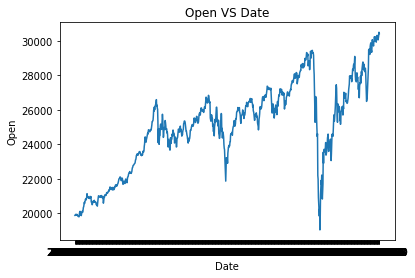

In [6]:
# VISUALIZE FINANCE DATA - Executions

createLineGraph('DJIA', 'test', "Date", "Open")